# Import modules

In [1]:
from pathlib import Path
import json
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import os

import import_ipynb
import Module_Diagnostics as MD

import pylab as pl
import glob
import re

from matplotlib import rc

#Debugger. For some reason, using it inside a function works well. Otherwise...
from IPython.core.debugger import set_trace
#exemple: 
# def debug():
#     set_trace()
    
#     `code_to_debug`
    
#     return

# debug()

In /home/clement/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/clement/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/clement/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/clement/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/clement/.local/lib/python3.6/site-packages/matplotlib/mpl-d

importing Jupyter notebook from Module_Diagnostics.ipynb
testing compute_RMS(...):
This should be close to 1: 1.0132862230855253
This should be close to 0: 0.0


# Plot settings

In [2]:
rcParams["figure.figsize"] = [10.4, 4.8]

# Choose the story

## Choose the run

In [3]:
Cluster = 'Zoidberg'
Cluster = 'Curie'
Cluster = 'Occ'

''''''''''''''''''''''''''''''''''''''''''''''''
run_name = '20_04_23_very_rough_big_one_Bz-By-_re'
''''''''''''''''''''''''''''''''''''''''''''''''
''''''''''''''''''''''''''''''''''''''''''''''''
run_name = '20_05_17_big_one_0'
''''''''''''''''''''''''''''''''''''''''''''''''
''''''''''''''''''''''''''''''''''''''''''''''''
run_name = '20_08_18_new_big_one_0'
''''''''''''''''''''''''''''''''''''''''''''''''

#Infos about this run
t_start_SW = 180
t_start_Sh = 217
t_start_MC = 247

t_Sh_at_x0 = 223

storing_directory = f"../{Cluster}/{run_name}/json_files/"
name = "sav_story_" + run_name + ".json"
path = Path(storing_directory + name)

## Choose the stories

In [31]:
#Stories dictionnary:
STORIES = {}

#Stories size
type_of_story_size = 'Magnetosheath size'
stories_to_tell_size = ('size_nose', 'size_yup', 'size_ydown', 'size_zup', 'size_zdown')
unit_size = r'$d_i$'
STORIES.update({type_of_story_size: {'stories': stories_to_tell_size, 'unit': unit_size}})

type_of_story_bow_shock = 'Position of the bow shock'
stories_to_tell_bow_shock = ('x_bow_shock',
                             'y_bow_shock_up', 'y_bow_shock_down',
                             'z_bow_shock_up', 'z_bow_shock_down')
STORIES.update({type_of_story_bow_shock: {'stories': stories_to_tell_bow_shock, 'unit': unit_size}})

type_of_story_magnetopause = 'Position of the Magnetopause'
stories_to_tell_magnetopause = ('x_magnetopause',
                                'y_magnetopause_up', 'y_magnetopause_down',
                                'z_magnetopause_up', 'z_magnetopause_down')
STORIES.update({type_of_story_magnetopause: {'stories': stories_to_tell_magnetopause, 'unit': unit_size}})

#Stories others
boxes = ('upstream', 'nose', 'yup', 'ydown', 'zup', 'zdown')

boxes_set_x = ('upstream', 'nose')
boxes_set_y = ('yup', 'ydown')
boxes_set_z = ('zup', 'zdown')

#Plasma parameters
#Stories N
type_of_story_N = 'Density'
stories_to_tell_N = [f'N_{box}' for box in boxes]
unit_N = r'cm$^{-3}$'
STORIES.update({type_of_story_N: {'stories': stories_to_tell_N, 'unit': unit_N}})

#Stories V
type_of_story_V = 'Plasma velocity'
stories_to_tell_V = [f'V_{box}' for box in boxes]
unit_V = r'km/s'
STORIES.update({type_of_story_V: {'stories': stories_to_tell_V, 'unit': unit_V}})

#Stories T
type_of_story_T = 'Proton temperature'
stories_to_tell_T = [f'T_{box}' for box in boxes]
unit_T = r'K'
STORIES.update({type_of_story_T: {'stories': stories_to_tell_T, 'unit': unit_T}})

#Fields
#Stories B
type_of_story_B = 'Magnetic Field'
stories_to_tell_B = [f'B_{box}' for box in boxes]
unit_B = r'nT'
STORIES.update({type_of_story_B: {'stories': stories_to_tell_B, 'unit': unit_B}})

type_of_story_Bz = 'Magnetic Field along z'
stories_to_tell_Bz = [f'Bz_{box}' for box in boxes]
STORIES.update({type_of_story_Bz: {'stories': stories_to_tell_Bz, 'unit': unit_B}})

#Stories E
type_of_story_E = 'Electric Field'
stories_to_tell_E = [f'E_{box}' for box in boxes]
unit_E = r'mV/m'
STORIES.update({type_of_story_E: {'stories': stories_to_tell_E, 'unit': unit_E}})

type_of_story_Ey = 'Driving electric field (Ey)'
stories_to_tell_Ey = [f'Ey_{box}' for box in boxes]
STORIES.update({type_of_story_Ey: {'stories': stories_to_tell_Ey, 'unit': unit_E}})

#Calculated
#Stories J
type_of_story_J = 'Current'
stories_to_tell_J = [f'J_{box}' for box in boxes]
unit_J = r'nA/m²'
STORIES.update({type_of_story_J: {'stories': stories_to_tell_J, 'unit': unit_J}})

#Stories rmsB
type_of_story_rmsB = 'Turbulence #1 (rmsB)'
stories_to_tell_rmsB = [f'rmsB_{box}' for box in boxes]
unit_rmsB = r'nT'
STORIES.update({type_of_story_rmsB: {'stories': stories_to_tell_rmsB, 'unit': unit_rmsB}})

type_of_story_rmsBoB = 'Turbulence #2 (rmsBoB)'
stories_to_tell_rmsBoB = [f'rmsBoB_{box}' for box in boxes]
unit_rmsBoB = r''
STORIES.update({type_of_story_rmsBoB: {'stories': stories_to_tell_rmsBoB, 'unit': unit_rmsBoB}})

#stories J.E (separated because complex)
type_of_story_JE = 'Joule heating (J.E) y = z = 0'
stories_to_tell_JE = [f'JE_{box}' for box in boxes_set_x]
unit_JE = r'pW/m$^3$'     #'nA/m² . mV/m'
STORIES.update({type_of_story_JE: {'stories': stories_to_tell_JE, 'unit': unit_JE}})

type_of_story_JE = 'Joule heating (J.E) x = z = 0'
stories_to_tell_JE = [f'JE_{box}' for box in boxes_set_y]
STORIES.update({type_of_story_JE: {'stories': stories_to_tell_JE, 'unit': unit_JE}})

type_of_story_JE = 'Joule heating (J.E) x = y = 0'
stories_to_tell_JE = [f'JE_{box}' for box in boxes_set_z]
STORIES.update({type_of_story_JE: {'stories': stories_to_tell_JE, 'unit': unit_JE}})

#stories JxB
type_of_story_JxB = 'Lorentz force (JxB)'
stories_to_tell_JxB = [f'JxB_{box}' for box in boxes]
unit_JxB = r'pN/m$^3$'     #'nA/m² . mV/m'
STORIES.update({type_of_story_JxB: {'stories': stories_to_tell_JxB, 'unit': unit_JxB}})

#stories Pressure
type_of_story_Pmag = 'Magnetic pressure'
stories_to_tell_Pmag = [f'Pmag_{box}' for box in boxes]
unit_P = r'nPa'
STORIES.update({type_of_story_Pmag: {'stories': stories_to_tell_Pmag, 'unit': unit_P}})

type_of_story_Pdyn = 'Dynamic pressure'
stories_to_tell_Pdyn = [f'Pdyn_{box}' for box in boxes]
STORIES.update({type_of_story_Pdyn: {'stories': stories_to_tell_Pdyn, 'unit': unit_P}})

type_of_story_Pth = 'Thermal pressure'
stories_to_tell_Pth = [f'Pth_{box}' for box in boxes]
STORIES.update({type_of_story_Pth: {'stories': stories_to_tell_Pth, 'unit': unit_P}})

#stories Beta
type_of_story_Beta = 'Plasma Beta'
stories_to_tell_Beta = [f'Beta_{box}' for box in boxes]
unit_Beta = ''
STORIES.update({type_of_story_Beta: {'stories': stories_to_tell_Beta, 'unit': unit_Beta}})

# Read the story

### Load data

In [32]:
with open(path, "r", encoding='utf-8') as story:
    data = json.load(story)

In [33]:
data['t00150']

{'x_ip_shock': 625.0,
 'x_mc_leading_edge': 753.0,
 'size_nose': 19.0,
 'size_yup': 43.0,
 'size_ydown': 49.0,
 'size_zup': 52.0,
 'size_zdown': 51.0,
 'x_bow_shock': 53.0,
 'x_magnetopause': 34.0,
 'y_bow_shock_up': 96.0,
 'y_bow_shock_down': -98.0,
 'y_magnetopause_up': 53.0,
 'y_magnetopause_down': -49.0,
 'z_bow_shock_up': 108.0,
 'z_bow_shock_down': -105.0,
 'z_magnetopause_up': 56.0,
 'z_magnetopause_down': -54.0,
 'boxes': {'upstream': {'coord_bow_shock': 53.0,
   'coord_magnetopause': 34.0,
   'box_indexes': {'xmax': 77.5,
    'xmin': 66.5,
    'ymax': 5.5,
    'ymin': -5.5,
    'zmax': 5.5,
    'zmin': -5.5},
   'center': [72.0, 0.0, 0.0]},
  'nose': {'coord_bow_shock': 53.0,
   'coord_magnetopause': 34.0,
   'box_indexes': {'xmax': 49.0,
    'xmin': 38.0,
    'ymax': 5.5,
    'ymin': -5.5,
    'zmax': 5.5,
    'zmin': -5.5},
   'center': [43.5, 0.0, 0.0]},
  'yup': {'coord_bow_shock': 96.0,
   'coord_magnetopause': 53.0,
   'box_indexes': {'xmax': 5.5,
    'xmin': -5.5,
    '

In [7]:
print(sorted(data.keys()))
print(len(data.keys()))

['t00150', 't00170', 't00190', 't00195', 't00200', 't00205', 't00210', 't00211', 't00212', 't00213', 't00214', 't00215', 't00216', 't00217', 't00218', 't00219', 't00220', 't00221', 't00222', 't00223', 't00224', 't00225', 't00226', 't00227', 't00228', 't00229', 't00230', 't00231', 't00232', 't00233', 't00234', 't00235', 't00236', 't00237', 't00238', 't00239', 't00240', 't00241', 't00242', 't00243', 't00244', 't00245', 't00250', 't00255', 't00260', 't00265', 't00270', 't00280', 't00290', 't00300']
50


In [8]:
data['t00215']

{'x_ip_shock': 66.0,
 'x_mc_leading_edge': 286.0,
 'size_nose': 21.0,
 'size_yup': 42.0,
 'size_ydown': 51.0,
 'size_zup': 53.0,
 'size_zdown': 51.0,
 'x_bow_shock': 54.0,
 'x_magnetopause': 33.0,
 'y_bow_shock_up': 100.0,
 'y_bow_shock_down': -100.0,
 'y_magnetopause_up': 58.0,
 'y_magnetopause_down': -49.0,
 'z_bow_shock_up': 110.0,
 'z_bow_shock_down': -108.0,
 'z_magnetopause_up': 57.0,
 'z_magnetopause_down': -57.0,
 'boxes': {'upstream': {'coord_bow_shock': 54.0,
   'coord_magnetopause': 33.0,
   'box_indexes': {'xmax': 81.5,
    'xmin': 68.5,
    'ymax': 6.5,
    'ymin': -6.5,
    'zmax': 6.5,
    'zmin': -6.5},
   'center': [75.0, 0.0, 0.0]},
  'nose': {'coord_bow_shock': 54.0,
   'coord_magnetopause': 33.0,
   'box_indexes': {'xmax': 50.0,
    'xmin': 37.0,
    'ymax': 6.5,
    'ymin': -6.5,
    'zmax': 6.5,
    'zmin': -6.5},
   'center': [43.5, 0.0, 0.0]},
  'yup': {'coord_bow_shock': 100.0,
   'coord_magnetopause': 58.0,
   'box_indexes': {'xmax': 6.5,
    'xmin': -6.5,
   

### Def plot functions

In [9]:
dropbox = os.environ['DROPBOX']

save_dir = dropbox + "/Apps/Overleaf/PhD_Manuscript/Images/LATHYS"

In [40]:
def select_color(chosen_story):
    color = '0.7'
    
    if ('nose' in chosen_story or 'x_' in chosen_story):
        color = 'RoyalBlue'
    if ('upstream') in chosen_story:
        color = 'Orchid'
    if (chosen_story.startswith('y') and ('_up' in chosen_story)) or ('yup' in chosen_story):    
        color = 'Red'
    if (chosen_story.startswith('y') and ('_down' in chosen_story)) or ('ydown' in chosen_story):    
        color = 'Orange'
    if (chosen_story.startswith('z') and ('_up' in chosen_story)) or ('zup' in chosen_story):    
        color = 'Green'
    if (chosen_story.startswith('z') and ('_down' in chosen_story)) or ('zdown' in chosen_story):    
        color = 'lawngreen'
    return color

def label(chosen_story):
    color = '0.7'
    
    if (chosen_story.startswith('y') and ('_up' in chosen_story)) or ('yup' in chosen_story):    
        label_chosen_story = chosen_story.replace("_up", "_dusk")
        label_chosen_story = label_chosen_story.replace("yup", "ydusk")
    elif (chosen_story.startswith('y') and ('_down' in chosen_story)) or ('ydown' in chosen_story):    
        label_chosen_story = chosen_story.replace("_down", "_dawn")
        label_chosen_story = label_chosen_story.replace("ydown", "ydawn")
        
    else: 
        label_chosen_story = chosen_story       

    return label_chosen_story

def tell_story(chosen_story, include_cloud=False, only_positive=False,
               with_lines=False, print_averages=False, specific_color=None):

    T = []
    Y = []
    
    for time_dump in sorted(data):
        
        if int(time_dump[1:]) > t_start_SW:
            try:
                if only_positive:
                    if isinstance(data[time_dump][chosen_story], list):
                        Y.append(MD.norm(data[time_dump][chosen_story]))
                    else:
                        Y.append(abs(data[time_dump][chosen_story]))
                else:
                    if isinstance(data[time_dump][chosen_story], list):
                        Y.append(MD.norm(data[time_dump][chosen_story]))
                    else:
                        Y.append(data[time_dump][chosen_story])
                T.append(int(time_dump.strip('t'))) 
            except KeyError:
                print(f"{chosen_story} for time {time_dump} has not been written yet")    
            if ( (include_cloud == False) and (int(time_dump[1:]) >= t_start_MC+8) ):
                break

    color = select_color(chosen_story)
    if specific_color:
        color = specific_color
    plt.scatter(T,Y, color=color, label=label(chosen_story))

    if print_averages:
        print(f"average {chosen_story} during solar wind conditions")
        print(np.mean(np.array(Y)[np.where(180<np.array(T)) and np.where(np.array(T)<t_start_Sh)]))
        print(f"average {chosen_story} during the sheath passage")
        print(np.mean(np.array(Y)[np.where(t_start_Sh<np.array(T)) and np.where(np.array(T)<t_start_MC)]))
    
    if with_lines:
        plt.plot(T,Y, linestyle='--', color=color)
    return

def tell_group_of_stories(stories_to_tell, type_of_story, unit, include_cloud = False,
                          only_positive=False, print_averages=False, colors=None):
    
    plt.figure()
    specific_color = None
    i = 0
    for story in stories_to_tell:
        if colors:
            specific_color = colors[i]
            i+=1
        tell_story(story, include_cloud, only_positive, specific_color = specific_color)  
    plt.xlabel(r"time ($\Omega_{ci}^{-1}$)", fontsize=14, weight='bold')
    plt.ylabel(f'{unit}', fontsize=15)        

    # get current xmin, xmax, ymin, ymax
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()    
    plt.ylim(ymin, ymax*1.1)
    ymin, ymax = plt.ylim() 
    
    plt.axvspan(xmin/2    , t_start_Sh  , facecolor='blue', alpha=0.1)
    plt.axvspan(t_start_Sh, t_start_MC  , facecolor='red', alpha=0.1)
    plt.axvspan(t_Sh_at_x0, t_start_MC  , facecolor='red', alpha=0.1)
    plt.axvspan(t_start_MC, xmax*2      , facecolor='yellow', alpha=0.2)
    
    # reset xmin, xmax to previous values. axvspan changed them and it is ugly
    plt.xlim(xmin, xmax)
     
    name_region = 'Solar Wind'
    plt.text(xmin+(t_start_Sh-xmin)/2-(len(name_region)+2)/2,
             ymin + 0.935*(ymax-ymin), name_region,
             bbox={'facecolor': 'blue', 'alpha': 0.5, 'pad': 4})
    
    name_region = 'Sheath'
    plt.text(t_start_Sh+(t_start_MC-t_start_Sh)/2-(len(name_region)+2)/2,
             ymin + 0.935*(ymax-ymin), name_region,
             bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 4})
    
    name_region = 'Magnetic Cloud'
    plt.text(t_start_MC+(xmax-t_start_MC)/2-(len(name_region)+2)/2,
             ymin + 0.935*(ymax-ymin), name_region,
             bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 4})
         
    plt.title(type_of_story, size = 'large', weight = 'bold')
#     plt.legend(loc='center left') #, bbox_to_anchor=(0.5, 0.5))    
    
    axe = plt.gca()    
    # Shrink current axis by 20%
    box = axe.get_position()
    axe.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    axe.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
        
    saving_title = type_of_story.replace(" ", "")
    saving_title = saving_title.replace(".", "")
    saving_title = saving_title.replace("#", "")
    plt.savefig(save_dir + '/' + saving_title + run_name + ".png",
                transparent=True, bbox_inches='tight', pad_inches=0.1)

    plt.show()
    
    return

### Plots

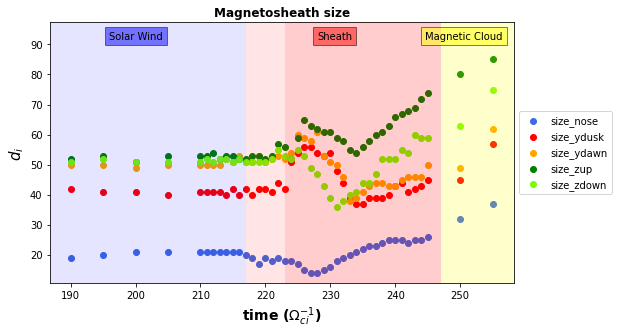

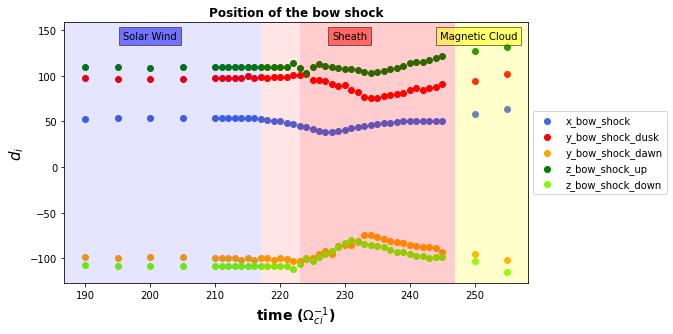

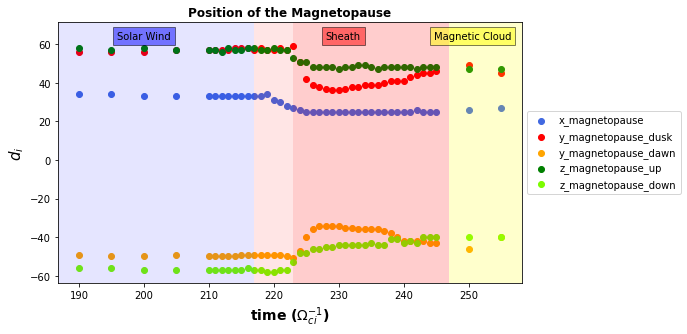

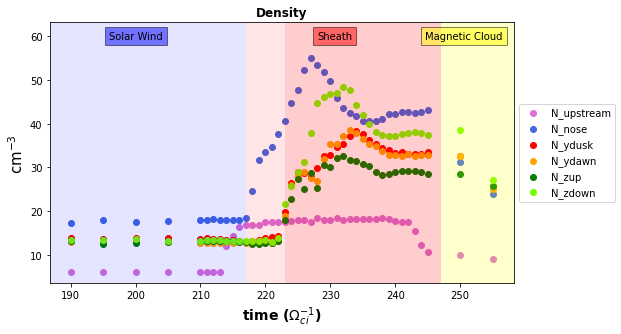

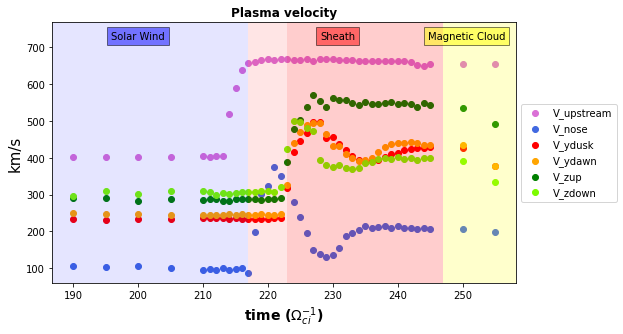

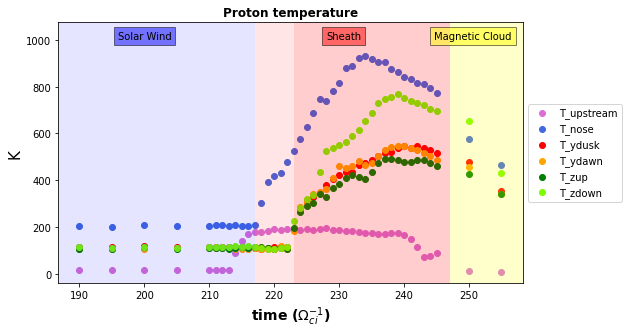

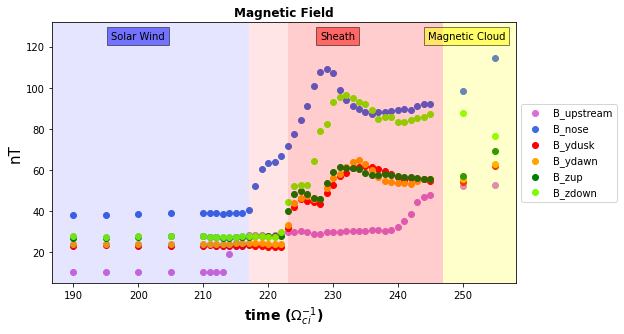

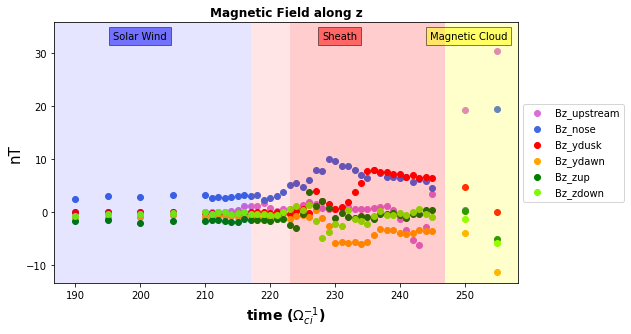

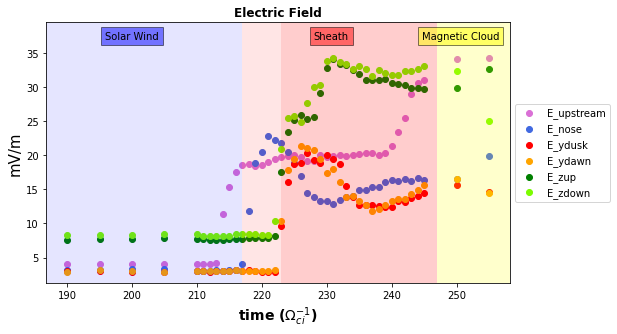

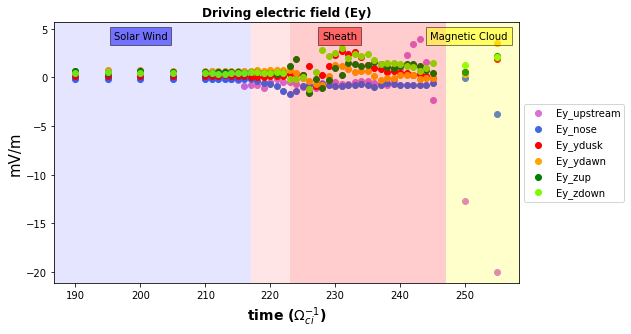

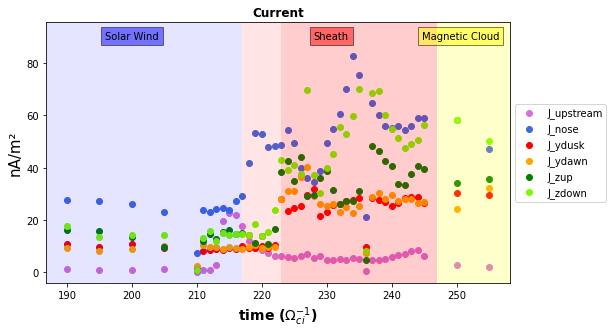

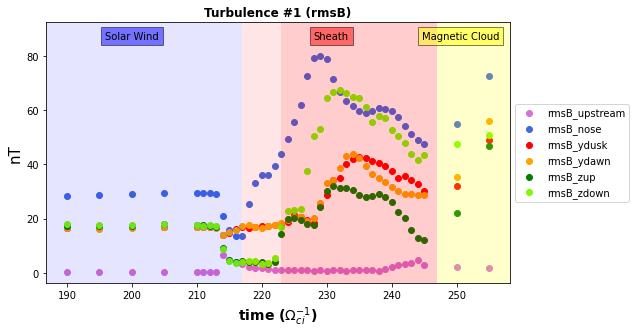

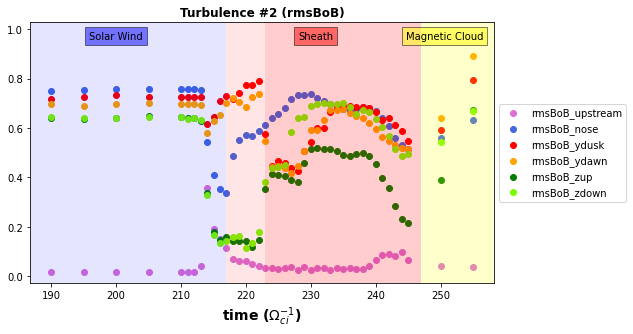

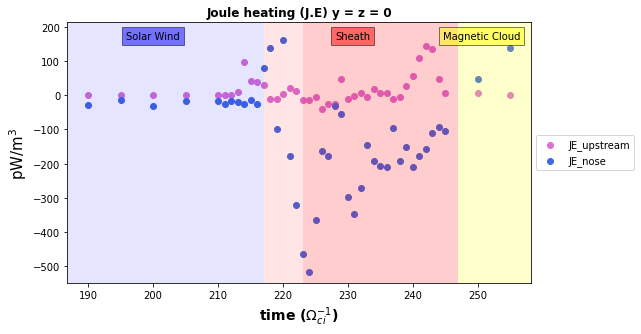

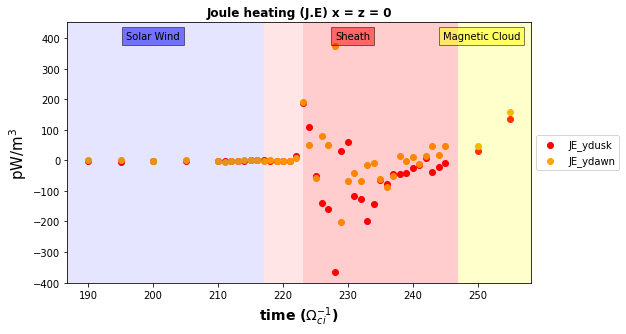

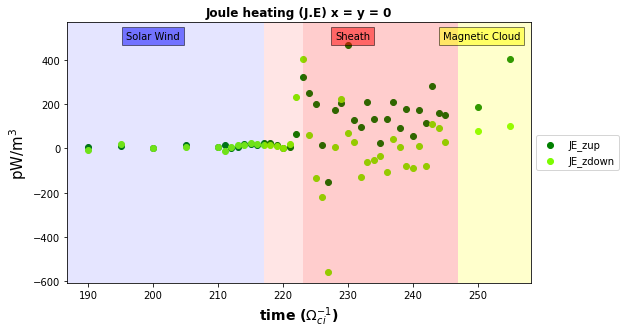

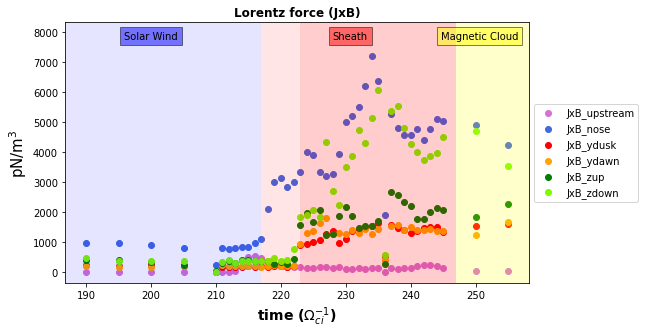

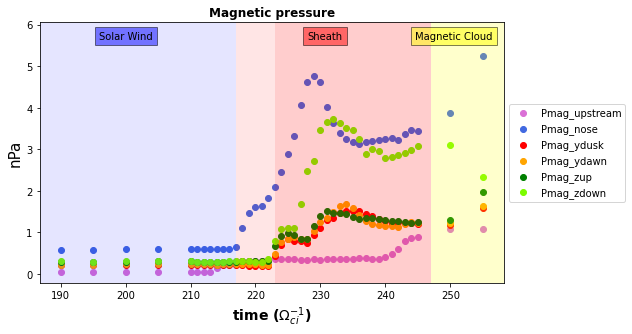

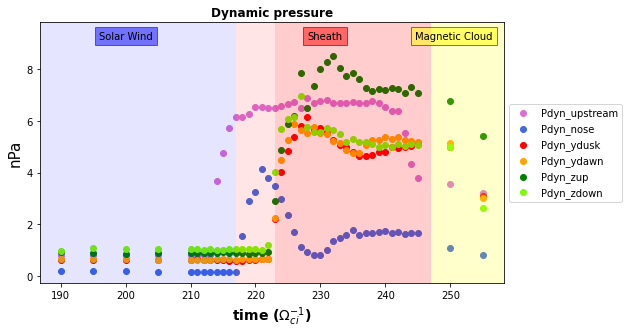

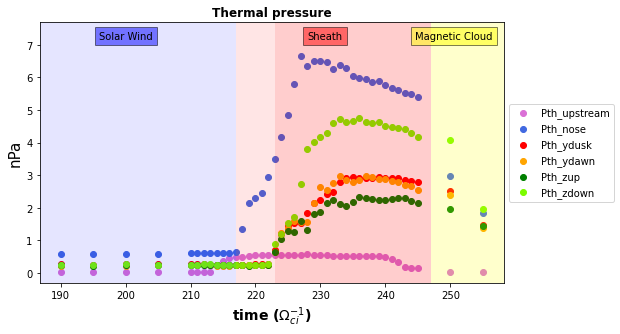

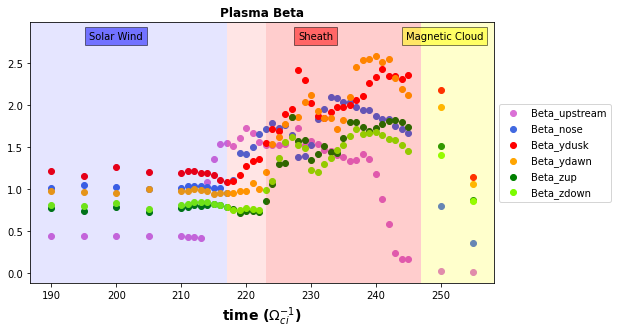

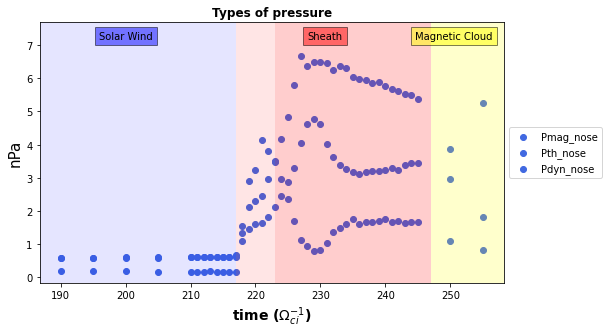

In [41]:
plt.close('all')
for group_of_stories in STORIES:
    tell_group_of_stories(stories_to_tell = STORIES[group_of_stories]['stories'],
                          type_of_story = group_of_stories,
                          unit = STORIES[group_of_stories]['unit'])


#### Simplified plots

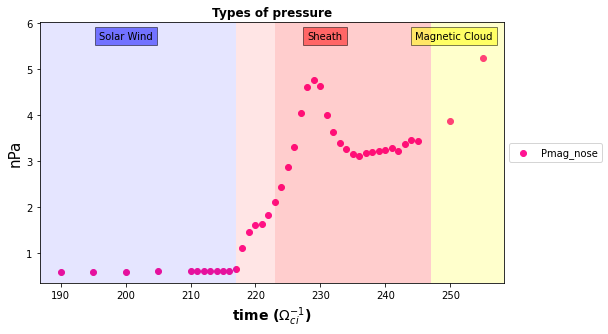

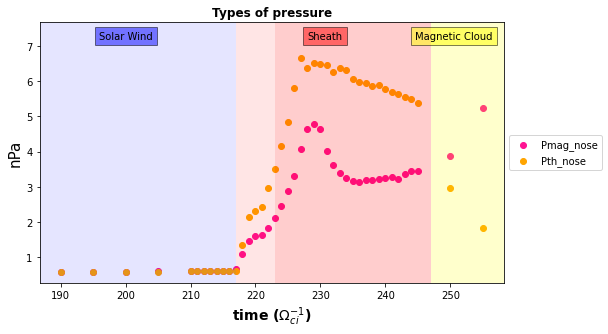

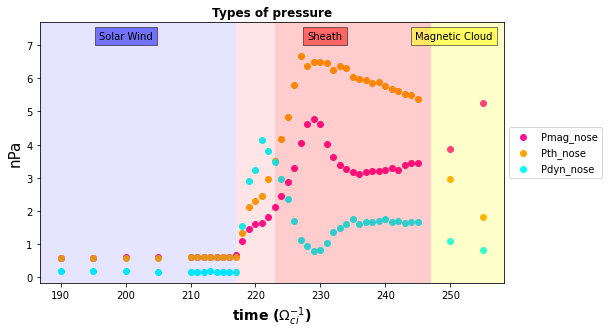

In [43]:
colors = ["deeppink", "orange", "cyan"]

#simplified story: Pressure
type_of_story_pressures = 'Types of pressure'
stories_to_tell_pressures = ['Pmag_nose']
STORIES.update({type_of_story_pressures: {'stories': stories_to_tell_pressures, 'unit': unit_P}})

tell_group_of_stories(stories_to_tell = STORIES[type_of_story_pressures]['stories'],
                          type_of_story = type_of_story_pressures,
                          unit = STORIES[type_of_story_pressures]['unit'], colors = colors)

#simplified story: Pressure
type_of_story_pressures = 'Types of pressure'
stories_to_tell_pressures = ['Pmag_nose', 'Pth_nose']
STORIES.update({type_of_story_pressures: {'stories': stories_to_tell_pressures, 'unit': unit_P}})

tell_group_of_stories(stories_to_tell = STORIES[type_of_story_pressures]['stories'],
                          type_of_story = type_of_story_pressures,
                          unit = STORIES[type_of_story_pressures]['unit'], colors = colors)

#simplified story: Pressure
type_of_story_pressures = 'Types of pressure'
stories_to_tell_pressures = ['Pmag_nose', 'Pth_nose', 'Pdyn_nose']
STORIES.update({type_of_story_pressures: {'stories': stories_to_tell_pressures, 'unit': unit_P}})

tell_group_of_stories(stories_to_tell = STORIES[type_of_story_pressures]['stories'],
                          type_of_story = type_of_story_pressures,
                          unit = STORIES[type_of_story_pressures]['unit'], colors = colors)

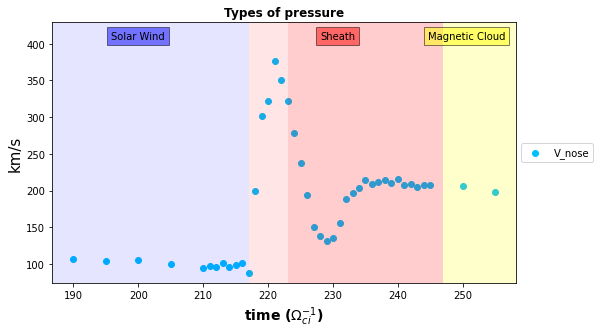

In [46]:
#simplified story: Pressure
type_of_story = 'Types of pressure'
stories_to_tell = ['V_nose']
STORIES.update({type_of_story: {'stories': stories_to_tell, 'unit': unit_V}})

tell_group_of_stories(stories_to_tell = STORIES[type_of_story]['stories'],
                          type_of_story = type_of_story,
                          unit = STORIES[type_of_story]['unit'], colors = ['deepskyblue'])

In [30]:
error

NameError: name 'error' is not defined

#### Checking some numbers

##### J.E

In [12]:
chosen_story = "JE_ydown"
only_positive = False
   
T = []
Y = []
include_cloud = False

for time_dump in sorted(data):

    if int(time_dump[1:]) > t_start_SW:
        try:
            if only_positive:
                if isinstance(data[time_dump][chosen_story], list):
                    Y.append(MD.norm(data[time_dump][chosen_story]))
                else:
                    Y.append(abs(data[time_dump][chosen_story]))
            else:
                if isinstance(data[time_dump][chosen_story], list):
                    Y.append(MD.norm(data[time_dump][chosen_story]))
                else:
                    Y.append(data[time_dump][chosen_story])
            T.append(int(time_dump.strip('t'))) 
        except KeyError:
            print(f"{chosen_story} for time {time_dump} has not been written yet")    
        if ( (include_cloud == False) and (int(time_dump[1:]) >= t_start_MC+8) ):
            break

In [13]:
print(T[16])
print(T[39])

np.mean(Y[16:39])

222
245


8.082894141919857

JE_ydusk = -56
JE_ydawn = 8
JE_zup   = 153
JE_zdown = -11.1

In [14]:
(-56+8)/2

-24.0

In [15]:
(153-11)/2

71.0

##### Magnetosheath size

In [16]:
chosen_story = "size_ydown"
only_positive = False
   
T = []
Y = []
include_cloud = True

for time_dump in sorted(data):

    if int(time_dump[1:]) > t_start_SW:
        try:
            if only_positive:
                if isinstance(data[time_dump][chosen_story], list):
                    Y.append(MD.norm(data[time_dump][chosen_story]))
                else:
                    Y.append(abs(data[time_dump][chosen_story]))
            else:
                if isinstance(data[time_dump][chosen_story], list):
                    Y.append(MD.norm(data[time_dump][chosen_story]))
                else:
                    Y.append(data[time_dump][chosen_story])
            T.append(int(time_dump.strip('t'))) 
        except KeyError:
            print(f"{chosen_story} for time {time_dump} has not been written yet")    
        if ( (include_cloud == False) and (int(time_dump[1:]) >= t_start_MC+8) ):
            break

In [17]:
Y

[50.0,
 50.0,
 49.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 52.0,
 51.0,
 53.0,
 51.0,
 51.0,
 53.0,
 51.0,
 52.0,
 53.0,
 52.0,
 54.0,
 60.0,
 59.0,
 58.0,
 61.0,
 53.0,
 51.0,
 50.0,
 46.0,
 38.0,
 39.0,
 41.0,
 43.0,
 44.0,
 44.0,
 43.0,
 43.0,
 45.0,
 46.0,
 46.0,
 46.0,
 50.0,
 49.0,
 62.0,
 77.0,
 89.0,
 100.0,
 118.0,
 146.0,
 113.0]

In [18]:
(227.5 - 216.5) / (245 - 216.5)

0.38596491228070173

In [19]:
Y[-3]

118.0

#### #1 Multivariate plot (x-direction)

In [20]:
x_bs_list = []
x_mp_list = []
x_ip_shock_list = []
x_mc_leading_edge_list = []
time_list = []
deltaP_list = []

for time in sorted(data):
    time_list.extend([int(time[1:])])
    x_bs_list.extend([data[time]['x_bow_shock']])
    x_mp_list.extend([data[time]['x_magnetopause']])    
    x_ip_shock_list.extend([data[time]['x_ip_shock']])
    x_mc_leading_edge_list.extend([data[time]['x_mc_leading_edge']])
    deltaP_list.extend([ data[time]['Pmag_nose']    +data[time]['Pth_nose']    +data[time]['Pdyn_nose']
                        -data[time]['Pmag_upstream']+data[time]['Pth_upstream']+data[time]['Pdyn_upstream']])

In [21]:
print(x_ip_shock_list)
print(x_mc_leading_edge_list)

[625.0, 454.0, 282.0, 239.0, 196.0, 153.0, 109.0, 101.0, 92.0, 83.0, 75.0, 66.0, 57.0, 48.0, 40.0, 31.0, 22.0, 13.0, 5.0, -4.0, -13.0, -22.0, -31.0, -39.0, -48.0, -57.0, -65.0, -74.0, -83.0, -92.0, -100.0, -100.0, 743.0, 740.0, 737.0, 734.0, 731.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[753.0, 605.0, 461.0, 429.0, 382.0, 356.0, 321.0, 313.0, 307.0, 298.0, 134.0, 286.0, 265.0, 272.0, 265.0, 258.0, 239.0, 244.0, 237.0, 230.0, 223.0, 215.0, 208.0, 201.0, 194.0, 186.0, 179.0, 170.0, 163.0, 155.0, 148.0, 141.0, 133.0, 126.0, 119.0, 112.0, 105.0, 98.0, 91.0, 83.0, 77.0, 69.0, 20.0, -18.0, -45.0, -79.0, -81.0, nan, nan, nan]


In [22]:
# This is a safeguard. However if metadata in Story_Writer.ipynb is well defined, this shouldn't be necessary

x_is = [(time_list[0],x_ip_shock_list[0])]
x_is = [ (time_list[i], x_ip_shock_list[i]) 
         for i in range(0, len(x_ip_shock_list))
         if (i==0 or (x_ip_shock_list[i] < min([x[1] for x in x_is]))) ]

x_le = [(time_list[0],x_mc_leading_edge_list[0])]
x_le = [ (time_list[i], x_mc_leading_edge_list[i])
         for i in range(0, len(x_mc_leading_edge_list))
         if (i==0 or x_mc_leading_edge_list[i] < min([x[1] for x in x_le])) ]

print(x_is)
print(x_le)

[(150, 625.0), (170, 454.0), (190, 282.0), (195, 239.0), (200, 196.0), (205, 153.0), (210, 109.0), (211, 101.0), (212, 92.0), (213, 83.0), (214, 75.0), (215, 66.0), (216, 57.0), (217, 48.0), (218, 40.0), (219, 31.0), (220, 22.0), (221, 13.0), (222, 5.0), (223, -4.0), (224, -13.0), (225, -22.0), (226, -31.0), (227, -39.0), (228, -48.0), (229, -57.0), (230, -65.0), (231, -74.0), (232, -83.0), (233, -92.0), (234, -100.0), (235, -100.0)]
[(150, 753.0), (170, 605.0), (190, 461.0), (195, 429.0), (200, 382.0), (205, 356.0), (210, 321.0), (211, 313.0), (212, 307.0), (213, 298.0), (214, 134.0), (215, 286.0), (216, 265.0), (217, 272.0), (218, 265.0), (219, 258.0), (220, 239.0), (221, 244.0), (222, 237.0), (223, 230.0), (224, 223.0), (225, 215.0), (226, 208.0), (227, 201.0), (228, 194.0), (229, 186.0), (230, 179.0), (231, 170.0), (232, 163.0), (233, 155.0), (234, 148.0), (235, 141.0), (236, 133.0), (237, 126.0), (238, 119.0), (239, 112.0), (240, 105.0), (241, 98.0), (242, 91.0), (243, 83.0), (244

In [23]:
from scipy.interpolate import interp1d
x_bs_smooth = interp1d(time_list, x_bs_list, kind='cubic')
x_mp_smooth = interp1d(time_list, x_mp_list, kind='cubic')
x_is_smooth = interp1d([t[0] for t in x_is],  [x[1] for x in x_is], kind='cubic')
x_le_smooth = interp1d([t[0] for t in x_le],  [x[1] for x in x_le], kind='cubic')
time_smooth = np.linspace(time_list[0], time_list[-1], num=1001, endpoint=True)
x_bs_smooth = x_bs_smooth(time_smooth)
x_mp_smooth = x_mp_smooth(time_smooth)
t_is_smooth = np.linspace([t[0] for t in x_is][0], [t[0] for t in x_is][-1], num=1001, endpoint=True)
x_is_smooth = x_is_smooth(t_is_smooth)
t_le_smooth = np.linspace([t[0] for t in x_le][0], [t[0] for t in x_le][-1], num=1001, endpoint=True)
x_le_smooth = x_le_smooth(t_le_smooth)

#### Old

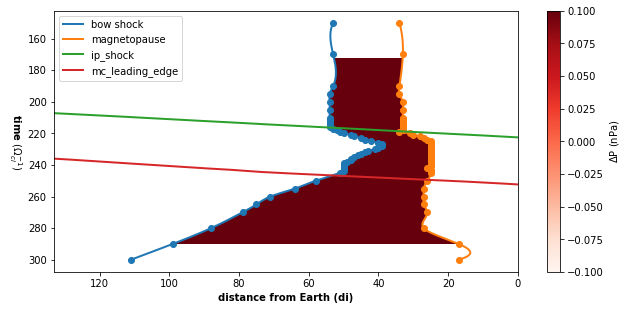

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x_bs_smooth, time_smooth, linewidth=2, label='bow shock')
plt.plot(x_mp_smooth, time_smooth, linewidth=2, label='magnetopause')
# plt.scatter(x_ip_shock_list, time_list, label='ip_shock')
plt.plot(x_is_smooth, t_is_smooth, linewidth=2, label='ip_shock')
# plt.scatter(x_mc_leading_edge_list, time_list, label='mc_leading_edge')
plt.plot(x_le_smooth, t_le_smooth, linewidth=2, label='mc_leading_edge')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('distance from Earth (di)', weight = 'bold')
plt.ylabel('time $(\Omega_{ci}^{-1})$', weight = 'bold', rotation=270)
ax.yaxis.set_label_coords(-0.1,0.5)
plt.legend()

import matplotlib
from matplotlib.collections import PatchCollection
import matplotlib.patches as patches

rectangles = []
colors = []

for i in range(150,len(time_smooth)):
    
    try:
        j = np.where(time_list < time_smooth[i])[0][-1]
    except IndexError: 
        j = j
    
    try:
        hauteur = time_smooth[i+1] - time_smooth[i]
    except IndexError:
        hauteur = np.mean(np.array(time_smooth[1:]) - np.array(time_smooth[:-1]))
            
    rectangle = patches.Rectangle( (x_mp_smooth[i],time_smooth[i])  , #position of the bottom-left corner (or top-right if axes are inverted)
                                    x_bs_smooth[i] - x_mp_smooth[i] , #largeur
                                    hauteur                         )
                                  
    rectangles.append(rectangle)
    colors.append(deltaP_list[j])
       
colors = np.array(colors)
p = PatchCollection(rectangles, cmap=matplotlib.cm.Reds)
p.set_array(colors)
ax.add_collection(p)
plt.colorbar(p, label = "$\Delta$P " + f"({unit_P})")
plt.xlim([1.2*max(x_bs_smooth), 0])

plt.scatter(x_bs_list, time_list, label='bow shock') 
plt.scatter(x_mp_list, time_list, label='magnetopause')

plt.show()


#### New

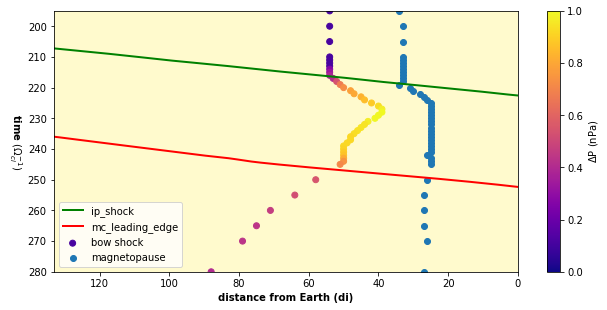

In [25]:
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(x_bs_list, time_list, label='bow shock', color=cm.plasma(np.array(deltaP_list)/max(deltaP_list))) 
plt.scatter(x_mp_list, time_list, label='magnetopause')
plt.plot(x_is_smooth, t_is_smooth, linewidth=2, label='ip_shock', color='green')
plt.plot(x_le_smooth, t_le_smooth, linewidth=2, label='mc_leading_edge', color='red')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('distance from Earth (di)', weight = 'bold')
plt.ylabel('time $(\Omega_{ci}^{-1})$', weight = 'bold', rotation=270)
ax.yaxis.set_label_coords(-0.1,0.5)
plt.legend()

import matplotlib
from matplotlib.collections import PatchCollection
import matplotlib.patches as patches

rectangles = []
colors = []

for i in range(150,len(time_smooth)):
    
    try:
        j = np.where(time_list < time_smooth[i])[0][-1]
    except IndexError: 
        j = j
    
    try:
        hauteur = time_smooth[i+1] - time_smooth[i]
    except IndexError:
        hauteur = np.mean(np.array(time_smooth[1:]) - np.array(time_smooth[:-1]))
            
    rectangle = patches.Rectangle( (x_mp_smooth[i],time_smooth[i])  , #position of the bottom-left corner (or top-right if axes are inverted)
                                    x_bs_smooth[i] - x_mp_smooth[i] , #largeur
                                    hauteur                         )
                                  
    rectangles.append(rectangle)
    colors.append(deltaP_list[j])
        
colors = []    
for j in range(150, len(time_list)):
    colors.append(deltaP_list[j])
       
colors = np.array(colors)
p = PatchCollection(rectangles, cmap=matplotlib.cm.plasma)
p.set_array(colors)
ax.add_collection(p)
plt.colorbar(p, label = "$\Delta$P " + f"({unit_P})")
plt.xlim([1.2*max(x_bs_smooth), 0])
plt.ylim([280, 195]
        )

#add background color
ax.set_facecolor('lemonchiffon')

saving_title = "multivariate_collision_"
plt.savefig(save_dir + '/' + saving_title + run_name + ".png",
            transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.show()


#### Zoom

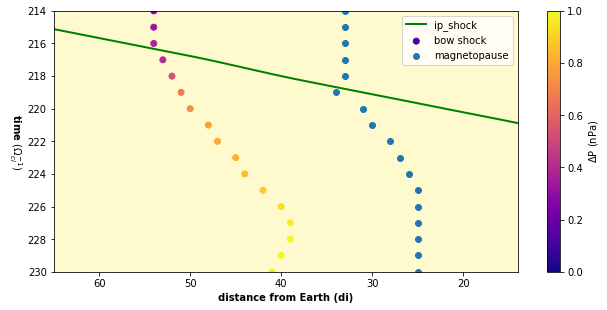

In [26]:
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(x_bs_list, time_list, label='bow shock', color=cm.plasma(np.array(deltaP_list)/max(deltaP_list))) 
plt.scatter(x_mp_list, time_list, label='magnetopause')
plt.plot(x_is_smooth, t_is_smooth, linewidth=2, label='ip_shock', color='green')
# plt.plot(x_le_smooth, t_le_smooth, linewidth=2, label='mc_leading_edge', color='red')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('distance from Earth (di)', weight = 'bold')
plt.ylabel('time $(\Omega_{ci}^{-1})$', weight = 'bold', rotation=270)
ax.yaxis.set_label_coords(-0.1,0.5)
plt.legend()

import matplotlib
from matplotlib.collections import PatchCollection
import matplotlib.patches as patches

rectangles = []
colors = []

for i in range(150,len(time_smooth)):
    
    try:
        j = np.where(time_list < time_smooth[i])[0][-1]
    except IndexError: 
        j = j
    
    try:
        hauteur = time_smooth[i+1] - time_smooth[i]
    except IndexError:
        hauteur = np.mean(np.array(time_smooth[1:]) - np.array(time_smooth[:-1]))
            
    rectangle = patches.Rectangle( (x_mp_smooth[i],time_smooth[i])  , #position of the bottom-left corner (or top-right if axes are inverted)
                                    x_bs_smooth[i] - x_mp_smooth[i] , #largeur
                                    hauteur                         )
                                  
    rectangles.append(rectangle)
    colors.append(deltaP_list[j])
        
colors = []    
for j in range(150, len(time_list)):
    colors.append(deltaP_list[j])
       
colors = np.array(colors)
p = PatchCollection(rectangles, cmap=matplotlib.cm.plasma)
p.set_array(colors)
ax.add_collection(p)
plt.colorbar(p, label = "$\Delta$P " + f"({unit_P})")
plt.xlim([65, 14])
plt.ylim([230, 214]
        )

#add background color
ax.set_facecolor('lemonchiffon')

saving_title = "multivariate_collision_zoom_"
plt.savefig(save_dir + '/' + saving_title + run_name + ".png",
            transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.show()


#### #2 First story y & z directions

In [27]:
STORIES_2 = {}

type_of_story_bs_mp_flanks = 'Position of the bow shock & magnetopause on the flanks'
stories_to_tell_bs_mp_flanks = ('y_bow_shock_up', 'y_bow_shock_down',
                                'z_bow_shock_up', 'z_bow_shock_down',
                                'y_magnetopause_up', 'y_magnetopause_down',
                                'z_magnetopause_up', 'z_magnetopause_down')
STORIES_2.update({type_of_story_bs_mp_flanks: {'stories': stories_to_tell_bs_mp_flanks, 'unit': unit_size}})

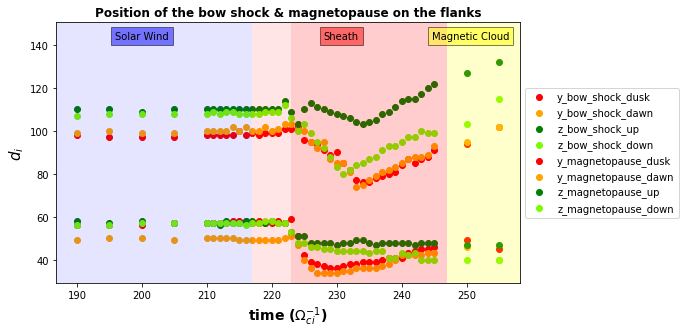

In [28]:
plt.close('all')
for group_of_stories in STORIES_2:
    tell_group_of_stories(stories_to_tell = STORIES_2[group_of_stories]['stories'],
                          type_of_story = group_of_stories,
                          unit = STORIES_2[group_of_stories]['unit'],
                          only_positive = True,
                          include_cloud = False)

In [29]:
error

NameError: name 'error' is not defined

### Comparison to real data

#### Turbulence

In [ ]:
for rmsB in STORIES['Turbulence #1 (rmsB)']['stories']:
    print(rmsB)
    for t in data:
        print(f'{t} : {data[t][rmsB]:.2f}')

In [ ]:
STORIES['Turbulence #1 (rmsB)']['stories']

In [ ]:
for rmsBoB in STORIES['Turbulence #2 (rmsBoB)']['stories']:
    print(rmsBoB)
    for t in data:
        print(f'{t} : {data[t][rmsBoB]:.2f}')

#### Velocity

In [ ]:
# Estimation of V_A and V_MS
b = 1e-9
n = 1e6
v = 1e3
t = 11605

def V_Alfven(box, time):
    '''
    box in ['upstream', 'nose', 'yup', 'ydown', 'zup', 'zdown']
    '''
    B = data[time][f'B_{box}']
    N = data[time][f'N_{box}']
    v_A = np.sqrt((b*B)**2 / (MD.mp * (n*N) * MD.µ0))
    return v_A/v #(km/s)

def C_sound(box, time):
    '''
    box in ['upstream', 'nose', 'yup', 'ydown', 'zup', 'zdown']
    '''
    T = data[time][f'T_{box}']
    c_s = np.sqrt(MD.kB * t*T / MD.mp)
    return c_s/v #(km/s)

def V_fast(box, time):
    '''
    box in ['upstream', 'nose', 'yup', 'ydown', 'zup', 'zdown']
    '''
    v_ms = np.sqrt(V_Alfven(box, time)**2+C_sound(box, time)**2)
    return v_ms #(km/s)

In [ ]:
# t_quiet = 't00180'
# box = 'zdown'

# V_fast(box, t_quiet) < data[t_quiet][f'V_{box}']

In [ ]:
# print(f"V_{box} = {data[t_quiet][f'V_{box}']:.0f} km/s")

In [ ]:
# print(f"C_sound = {C_sound(box, t_quiet):.0f} km/s")
# print(f"V_Alfven = {V_Alfven(box, t_quiet):.0f} km/s")
# print(f"V_fast = {V_fast(box, t_quiet):.0f} km/s")

In [ ]:
v_A = np.sqrt((b*47)**2 / (MD.mp * (n*73) * MD.µ0)) / v
print(430/v_A)

#### Pressure

In [ ]:
# box = 'upstream'

# print(f"P_total = {data[t_quiet][f'Pth_{box}']+data[t_quiet][f'Pdyn_{box}']+data[t_quiet][f'Pmag_{box}'] :.2f} nPa")

#### Beta

In [ ]:
# t_quiet = 't00180'
# box = 'nose'

# data[t_quiet][f'Beta_{box}']

#### Rankine-Hugoniot

##### Gather

In [ ]:
time_vec = []

N_upstream, N_nose = ([], [])

Vx_upstream = []
Vx_nose = []
Vy_upstream = []
Vy_nose = []
Vz_upstream = []
Vz_nose = []

Bx_upstream = []
Bx_nose = []
By_upstream = []
By_nose = []
Bz_upstream = []
Bz_nose = []

Pth_upstream = []
Pth_nose = []
Pdyn_upstream = []
Pdyn_nose = []
Pmag_upstream = []
Pmag_nose = []


for time_label in data:
    
    time_vec = time_vec + [ int(time_label[1:]) ]
    
    N_upstream = N_upstream + [ data[time_label]['N_upstream'] ]
    N_nose = N_nose + [ data[time_label]['N_nose'] ]
    
    Vx_upstream = Vx_upstream + [ data[time_label]['Vx_upstream'] ]
    Vx_nose = Vx_nose + [ data[time_label]['Vx_nose'] ]
    Vy_upstream = Vy_upstream + [ data[time_label]['Vy_upstream'] ]
    Vy_nose = Vy_nose + [ data[time_label]['Vy_nose'] ]
    Vz_upstream = Vz_upstream + [ data[time_label]['Vz_upstream'] ]
    Vz_nose = Vz_nose + [ data[time_label]['Vz_nose'] ]
        
    Bx_upstream = Bx_upstream + [ data[time_label]['Bx_upstream'] ]
    Bx_nose = Bx_nose + [ data[time_label]['Bx_nose'] ]
    By_upstream = By_upstream + [ data[time_label]['By_upstream'] ]
    By_nose = By_nose + [ data[time_label]['By_nose'] ]
    Bz_upstream = Bz_upstream + [ data[time_label]['Bz_upstream'] ]
    Bz_nose = Bz_nose + [ data[time_label]['Bz_nose'] ]
    
    Pth_upstream = Pth_upstream + [ data[time_label]['Pth_upstream'] ]
    Pth_nose = Pth_nose + [ data[time_label]['Pth_nose'] ]
    Pdyn_upstream = Pdyn_upstream + [ data[time_label]['Pdyn_upstream'] ]
    Pdyn_nose = Pdyn_nose + [ data[time_label]['Pdyn_nose'] ]
    Pmag_upstream = Pmag_upstream + [ data[time_label]['Pmag_upstream'] ]
    Pmag_nose = Pmag_nose + [ data[time_label]['Pmag_nose'] ]

##### $$ [B_x] = 0 $$

In [ ]:
plt.close()
plt.plot(time_vec, Bx_upstream, label = 'Bx_upstream')
plt.plot(time_vec, Bx_nose, label = 'Bx_nose')
plt.xlabel(r"time ($\Omega_{ci}^{-1}$)")
plt.ylabel(f' (nT)')
plt.legend()
plt.show()

#####  $$ [B_y V_x - B_x V_y] = 0 $$

In [ ]:
plt.close()

plt.plot(time_vec,
         [By_upstream[i]*Vx_upstream[i] - Bx_upstream[i]*Vy_upstream[i] for i in range(0, len(time_vec))],
         label = '(By Vx - Bx Vy)_upstream')

plt.plot(time_vec,
         [By_nose[i]*Vx_nose[i] - Bx_nose[i]*Vy_nose[i] for i in range(0, len(time_vec))],
         label = '(By Vx - Bx Vy)_nose')

plt.xlabel(r"time ($\Omega_{ci}^{-1}$)")
plt.ylabel(f' (nT . km/s)')
plt.legend()
plt.show()


##### $$ [B_z V_x - B_x V_z] = 0 $$

In [ ]:
plt.close()

plt.plot(time_vec,
         [Bz_upstream[i]*Vx_upstream[i] - Bx_upstream[i]*Vz_upstream[i] for i in range(0, len(time_vec))],
         label = '(Bz Vx - Bx Vz)_upstream')

plt.plot(time_vec,
         [Bz_nose[i]*Vx_nose[i] - Bx_nose[i]*Vz_nose[i] for i in range(0, len(time_vec))],
         label = '(Bz Vx - Bx Vz)_nose')

plt.xlabel(r"time ($\Omega_{ci}^{-1}$)")
plt.ylabel(f' (nT . km/s)')
plt.legend()
plt.show()


##### $$ [N V_x] = 0 $$

In [ ]:
plt.close()

plt.plot(time_vec,
         [N_upstream[i]*Vx_upstream[i] for i in range(0, len(time_vec))],
         label = '(N Vx)_upstream')

plt.plot(time_vec,
         [N_nose[i]*Vx_nose[i] for i in range(0, len(time_vec))],
         label = '(N Vx)_nose')

plt.xlabel(r"time ($\Omega_{ci}^{-1}$)")
plt.ylabel(f' (m^-3 . km/s)')
plt.legend()
plt.show()


##### $$ [P_{th} + P_{dyn} + P_{mag}] = 0 $$

In [ ]:
plt.close()

plt.plot(time_vec,
         [ Pth_upstream[i] + Pdyn_upstream[i] + Pmag_upstream[i] for i in range(0, len(time_vec)) ],
         label = '(Pth + Pmag + Pdyn)_upstream')

plt.plot(time_vec,
         [ Pth_nose[i] + Pdyn_nose[i] + Pmag_nose[i] for i in range(0, len(time_vec)) ],
         label = '(Pth + Pmag + Pdyn)_nose')

plt.xlabel(r"time ($\Omega_{ci}^{-1}$)")
plt.ylabel(f' (nPa)')
plt.legend()
plt.show()


##### $$ [ \rho V_x V_y - B_x B_y / \mu_0] = 0 $$ 

In [ ]:
plt.close()

v = 1e3
b = 1e-9
p = 1e9

plt.plot(time_vec,
         [  MD.mp * Vx_upstream[i] * Vy_upstream[i] * v**2 * p
          - Bx_upstream[i] * By_upstream[i] / MD.µ0 * b**2 * p for i in range(0, len(time_vec)) ],
         label = '(rho Vx Vy - Bx By / µ0)_upstream')

plt.plot(time_vec,
         [  MD.mp * Vx_nose[i] * Vy_nose[i] * v**2 * p
          - Bx_nose[i] * By_nose[i] / MD.µ0 * b**2 * p for i in range(0, len(time_vec)) ],
         label = '(rho Vx Vy - Bx By / µ0)_nose')

plt.xlabel(r"time ($\Omega_{ci}^{-1}$)")
plt.ylabel(f' (nPa)')
plt.legend()
plt.show()


##### $$ [ \rho V_x V_z - B_x B_z / \mu_0] = 0 $$ 

In [ ]:
plt.close()

v = 1e3
b = 1e-9
p = 1e9

plt.plot(time_vec,
         [  MD.mp * Vx_upstream[i] * Vz_upstream[i] * v**2 * p
          - Bx_upstream[i] * Bz_upstream[i] / MD.µ0 * b**2 * p for i in range(0, len(time_vec)) ],
         label = '(rho Vx Vz - Bx Bz / µ0)_upstream')

plt.plot(time_vec,
         [  MD.mp * Vx_nose[i] * Vz_nose[i] * v**2 * p
          - Bx_nose[i] * Bz_nose[i] / MD.µ0 * b**2 * p for i in range(0, len(time_vec)) ],
         label = '(rho Vx Vz - Bx Bz / µ0)_nose')

plt.xlabel(r"time ($\Omega_{ci}^{-1}$)")
plt.ylabel(f' (nPa)')
plt.legend()
plt.show()


# Temporal_B

### Virtual Satellites

In [ ]:
data_quiet = {}
for t in data:
    if int(t[1:]) <= 190: #warning: ugly manual value
        data_quiet.update({t: {'B_upstream': data[t]['B_upstream'],
                               'V_upstream': data[t]['V_upstream'],
                               'N_upstream': data[t]['N_upstream']}})
        
B0 = np.mean([data_quiet[t]['B_upstream'] for t in data_quiet])
N0 = np.mean([data_quiet[t]['N_upstream'] for t in data_quiet])
#Alfven speed is used to normalise velocities in Lathys
V0 = B0*MD.b / np.sqrt(N0*MD.n*MD.mp*MD.µ0) / MD.v 

print(B0, V0, N0)

In [ ]:
B_time_directory = '../' + Cluster + '/' + run_name + '/temporal_B/'
satellites = {}

In [ ]:
for filename in os.listdir(B_time_directory):
    
    file = B_time_directory + filename 
    satellites = MD.update_satellites_with_satellite_info(satellites, file, B0, V0, N0)

In [ ]:
# with open(file , "r", encoding='utf-8') as f:

#     content = f.read()
#     infos = content.split()
#     infos = content.split('time')[1:]    
    
#     for info in infos:
#         liste = info.split()

#         index_b = liste.index('B_field%xyz')
#         index_v = liste.index('velocity%xyz')
#         index_n = liste.index('density')

#         B_field_x = liste[index_b + 1] * B0


In [ ]:
time_of_interest = 't00195'

boxes = data[time_of_interest]['boxes']

satellites_boxes = {}

for box in boxes:
    closest_sat = MD.find_closest_virtual_satellite(satellites, box, boxes)
    satellites_boxes.update({box : satellites[closest_sat]})

In [ ]:
#choose a satellite far away from the magnetosheath
sat_id = '03000'
satellites_boxes.update({'unperturbed event' : satellites[sat_id]})
print("unperturbed event's satellite position:", satellites[sat_id]['position'] )

In [ ]:
#choose a satellite that will cross the bow shock twice
sat_id = '5000'
satellites_boxes.update({'two crossings' : satellites[sat_id]})
print("two bow shock crossings' satellite position:", satellites[sat_id]['position'] )

In [ ]:
%matplotlib notebook
fig, ax = MD.plot_virtual_sats_positions(satellites)

# MD.plot_virtual_sats_positions(satellites_boxes, color='blue', pre_figure=(fig, ax))

yy, zz = np.meshgrid(range(-50, 50), range(-50, 50))
# ax.plot_surface(boxes['nose']['coord_bow_shock'], yy, zz,  alpha=0.8)

plt.show()

In [ ]:
fig, ax = MD.plot_virtual_sats_positions(satellites_boxes, color='blue')

In [ ]:
# plt.close('all')
# #Note: not the best way to think about it. The boxes change position during the simulation...
# for box in boxes:    
#     MD.plot_temporal_B(satellites_boxes[box], title = box + f" at {satellites_boxes[box]['position']}")

In [ ]:
tlim = (180, 290)

In [ ]:
box = 'unperturbed event'

time_vec, (Bx, By, Bz), (Vx, Vy, Vz), N = MD.plot_temporal_B(satellites_boxes[box],
                                                             title = box + f" at {satellites_boxes[box]['position']}",
                                                             save_dir = save_dir, run_name = run_name, xlim = tlim)

B = np.array([np.sqrt(Bx[i]**2 + By[i]**2 + Bz[i]**2) for i in range(0, len(Bx))])
V = np.array([np.sqrt(Vx[i]**2 + Vy[i]**2 + Vz[i]**2) for i in range(0, len(Vx))])

In [ ]:
Bx_SM = np.mean(Bx[177:197])
Bx_SH = np.mean(Bx[227:232])
By_SM = np.mean(By[177:197])
By_SH = np.mean(By[227:232])
Bz_SM = np.mean(Bz[177:197])
Bz_SH = np.mean(Bz[227:232])

Vx_SM = np.mean(Vx[177:197])
Vx_SH = np.mean(Vx[227:232])
Vy_SM = np.mean(Vy[177:197])
Vy_SH = np.mean(Vy[227:232])
Vz_SM = np.mean(Vz[177:197])
Vz_SH = np.mean(Vz[227:232])

N_SM = np.mean(N[177:197])
N_SH = np.mean(N[227:232])

In [ ]:
Vz_SH

In [ ]:
Vx_SH * Bz_SH / Bx_SH

In [ ]:
np.mean((Vx * Bz / Bx)[227:232])

In [ ]:
satellites_boxes.keys()

In [ ]:
for box in satellites_boxes:
    
    time_vec, (Bx, By, Bz), (Vx, Vy, Vz), N = MD.plot_temporal_B(satellites_boxes[box],
                                                             title = box + f" at {satellites_boxes[box]['position']}",
                                                             save_dir = save_dir, run_name = run_name, xlim = tlim)

In [ ]:
box = 'two crossings'

time_vec, (Bx, By, Bz), (Vx, Vy, Vz), N = MD.plot_temporal_B(satellites_boxes[box],
                                                             title = box + f" at {satellites_boxes[box]['position']}",
                                                             save_dir = save_dir, run_name = run_name)

B = [np.sqrt(Bx[i]**2 + By[i]**2 + Bz[i]**2) for i in range(0, len(Bx))]

### Spectra & Cie

In [ ]:
satellites_boxes.keys()

In [ ]:
box = 'upstream'

time_vec, (Bx, By, Bz), (Vx, Vy, Vz), N = MD.plot_temporal_B(satellites_boxes[box],
                                                             title = box + f" at {satellites_boxes[box]['position']}",
                                                             save_dir = save_dir, run_name = run_name, xlim = [160, 300])

B = [np.sqrt(Bx[i]**2 + By[i]**2 + Bz[i]**2) for i in range(0, len(Bx))]

In [ ]:
def temporal_B_spectra(t_start_Sh, t_start_MC, tlim, satellites_boxes, box, Bx, By, Bz, show=True):
    '''
    Input example: t_start_Sh = 217, t_start_MC = 247, box = 'yup'
    The times come from the simulation results:
        t_start_Sh is the time of shock/shock collision,
        t_start_MC is the time of leading_edge / bow_shock collision
    This function then creates nice little intervals on which to compute a spectrum.
    '''

    
    '''''''''''''''''''''''
       Compute
    '''''''''''''''''''''''
    
    if box == 'nose':
        d = -5
    elif box == 'upstream' or box == 'two crossings':
        print("sorry, but a spectrum on the upstream box would be quite ugly")
        return 
    elif box == 'unperturbed event':
        d = 0
    else:
        d = 1

    len_intervals = 20

    '''Solar wind'''

    t_SW_end = t_start_Sh - 7 + d
    t_SW_start = t_SW_end - len_intervals

    t_SW = np.array([t for t in range(t_SW_start, t_SW_end, 1)])

    '''Sheath'''

    t_Sh_start = t_start_Sh + 9 + d
    t_Sh_end   = t_Sh_start + len_intervals

    t_Sh = np.array([t for t in range(t_Sh_start, t_Sh_end, 1)])

    '''Magnetic Cloud'''

    t_MC_start = t_start_MC + 13-MD.n_avg + d
    t_MC_end   = t_MC_start + len_intervals + 2*MD.n_avg

    t_MC = np.array([t for t in range(t_MC_start+MD.n_avg, t_MC_end-MD.n_avg,1 )])
    
    time_vec, (Bx, By, Bz), (Vx, Vy, Vz), N = MD.plot_temporal_B(satellites_boxes[box],
                                                             title = box + f" at {satellites_boxes[box]['position']}",
                                                             save_dir = save_dir, run_name = run_name, xlim = [160, 300], show=False)
 
    B = np.sqrt(Bx**2 + By**2 + Bz**2)
    
    B_SW  = np.array(B[t_SW_start:t_SW_end])
    Bx_SW = np.array(Bx[t_SW_start:t_SW_end])
    By_SW = np.array(By[t_SW_start:t_SW_end])
    Bz_SW = np.array(Bz[t_SW_start:t_SW_end])

    T_SW, S_SW, PSD_tot_SW, PSD_para_SW, PSD_perp_SW = MD.spectra_maker(t_SW, Bx_SW, By_SW, Bz_SW, 'linear')
    B0_SW, Bx0_SW, By0_SW, Bz0_SW = MD.fluct_maker(t_SW, Bx_SW, By_SW, Bz_SW, 'linear')[-4:]


    B_Sh  = np.array(B[t_Sh_start:t_Sh_end])
    Bx_Sh = np.array(Bx[t_Sh_start:t_Sh_end])
    By_Sh = np.array(By[t_Sh_start:t_Sh_end])
    Bz_Sh = np.array(Bz[t_Sh_start:t_Sh_end])

    T_Sh, S_Sh, PSD_tot_Sh, PSD_para_Sh, PSD_perp_Sh = MD.spectra_maker(t_Sh, Bx_Sh, By_Sh, Bz_Sh, 'linear')
    B0_Sh, Bx0_Sh, By0_Sh, Bz0_Sh = MD.fluct_maker(t_Sh, Bx_Sh, By_Sh, Bz_Sh, 'linear')[-4:]


    B_MC  = np.array(B[t_MC_start:t_MC_end])
    Bx_MC = np.array(Bx[t_MC_start:t_MC_end])
    By_MC = np.array(By[t_MC_start:t_MC_end])
    Bz_MC = np.array(Bz[t_MC_start:t_MC_end])

    T_MC, S_MC, PSD_tot_MC, PSD_para_MC, PSD_perp_MC = MD.spectra_maker(t_MC, Bx_MC, By_MC, Bz_MC, 'slide')
    B0_MC, Bx0_MC, By0_MC, Bz0_MC = MD.fluct_maker(t_MC, Bx_MC, By_MC, Bz_MC, 'slide')[-4:]



    '''''''''''''''''''''''
       Plot preparation
    '''''''''''''''''''''''

    pl.close()

    # %matplotlib notebook
    import matplotlib.gridspec as gridspec

    def cm2inch(value):
        return value / 2.54

    Page = pl.figure(figsize=(cm2inch(40), cm2inch(39.7)))
    nb_lines = 10
    nb_columns = 3
    gs = gridspec.GridSpec(nb_lines, nb_columns)
    fsize = 14

    import matplotlib.colors       as colors

    cmap = colors.LinearSegmentedColormap.from_list('nameofcolormap',
        ['rebeccapurple','b','c','g','forestgreen','goldenrod','r','black'],gamma=0.9)

    f_SW = 1.0 / S_SW[:,0]
    f_Sh = 1.0 / S_Sh[:,0]
    f_MC = 1.0 / S_MC[:,0]

    # it should be that the lowest values are found in the solar wind
    # and the highest in the sheath
    PSD_min = np.min(PSD_tot_SW)/5
    PSD_max = np.max(PSD_tot_Sh)*5

    '''''''''''''''''''''''
        Temporal plots 
    '''''''''''''''''''''''
    
    bgd = 'white'
    lw = 2.5

    'temporal plot of B'
    axe = pl.subplot(gs[0:2,:])
    title = box + f" at {satellites_boxes[box]['position']}" + '\n'
    pl.title(title, weight='bold',  color='darkred', fontsize=16)
    pl.ylabel("Magnetic field\namplitude (nT)",  weight='bold', fontsize=fsize)
    axe.plot(time_vec, B, label="B")
    axe.plot(t_SW, B0_SW, color='blueviolet', linewidth=lw)
    axe.plot(t_Sh, B0_Sh, color='r', linewidth=lw)
    axe.plot(t_MC, B0_MC, color='goldenrod', linewidth=lw)
    pl.xticks(fontsize= fsize)
    pl.yticks(fontsize= fsize)
    axe.get_xaxis().set_visible(False)

    axe.axvline(t_SW[0], color='c')
    axe.axvline(t_SW[-1], color='c')
    axe.axvspan(t_SW[0], t_SW[-1], color='c', alpha=0.2)
    axe.axvline(t_Sh[0], color='r')
    axe.axvline(t_Sh[-1], color='r')
    axe.axvspan(t_Sh[0], t_Sh[-1], color='r', alpha=0.2)
    axe.axvline(t_MC[0], color='yellow')
    axe.axvline(t_MC[-1], color='yellow')
    axe.axvspan(t_MC[0], t_MC[-1], color='yellow', alpha=0.2)
    
    #add background color
    axe.set_facecolor(bgd)

    'temporal plot of Bx, By, Bz'
    axe = pl.subplot(gs[2:4,:], sharex=axe)
    pl.ylabel("B components (nT)",  weight='bold', fontsize=fsize)
    axe.plot(time_vec,Bx, label="Bx", color='blue')
    axe.plot(time_vec,By, label="By", color='orange')
    axe.plot(time_vec,Bz, label="Bz", color='green')
    pl.xticks(fontsize= fsize)
    pl.yticks(fontsize= fsize)

    axe.plot(t_SW,Bx0_SW, color='blueviolet', linewidth=lw)
    axe.plot(t_SW,By0_SW, color='blueviolet', linewidth=lw)
    axe.plot(t_SW,Bz0_SW, color='blueviolet', linewidth=lw)

    axe.plot(t_Sh,Bx0_Sh, color='r', linewidth=lw)
    axe.plot(t_Sh,By0_Sh, color='r', linewidth=lw)
    axe.plot(t_Sh,Bz0_Sh, color='r', linewidth=lw)

    axe.plot(t_MC,Bx0_MC, color='goldenrod', linewidth=lw)
    axe.plot(t_MC,By0_MC, color='goldenrod', linewidth=lw)
    axe.plot(t_MC,Bz0_MC, color='goldenrod', linewidth=lw)
    
    axe.axvline(t_SW[0], color='c')
    axe.axvline(t_SW[-1], color='c')
    axe.axvspan(t_SW[0], t_SW[-1], color='c', alpha=0.2)
    axe.axvline(t_Sh[0], color='r')
    axe.axvline(t_Sh[-1], color='r')
    axe.axvspan(t_Sh[0], t_Sh[-1], color='r', alpha=0.2)
    axe.axvline(t_MC[0], color='yellow')
    axe.axvline(t_MC[-1], color='yellow')
    axe.axvspan(t_MC[0], t_MC[-1], color='yellow', alpha=0.2)
    
    #add background color
    axe.set_facecolor(bgd)

    axe.set_xlim(tlim)
    axe.set_xlabel("$\Omega_{ci}^{-1}$", weight='bold', fontsize=1.5*fsize)

    pl.legend()

    Page.subplots_adjust(wspace=0)
    Page.subplots_adjust(hspace=0)

    '''''''''''''''''''''''
         Plot spectra
    '''''''''''''''''''''''

    f_min = 1 / (1+MD.n_avg)
    f_max = max(f_SW)
    freq_ticks = np.array([2, 3, 4, 5])*1e-1 #ugly hardcode

    ''' Plot Solar Wind Spectra '''

    'Spectral signal B'
    axe = pl.subplot(gs[5:,0])
    axe.set_title(r'Solar Wind', weight = 'bold', fontsize = 16)

    axe.scatter(f_SW,PSD_tot_SW   , label='total')
    axe.scatter(f_SW,PSD_para_SW , label='parallel B0')
    axe.scatter(f_SW,PSD_perp_SW , label='perpendicular B0')
    axe.set_xscale('log')
    axe.set_yscale('log')
    axe.set_xlim(left=f_min)
    axe.set_xlim(right=f_max)
    axe.set_ylim([PSD_min, PSD_max])
    axe.set_xticks(freq_ticks)
    axe.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    pl.xticks(fontsize= fsize)
    pl.yticks(fontsize= fsize)
    axe.set_ylabel('Power $(nT^2.Hz^{-1})$', weight = 'bold', fontsize = 1.5*fsize)
    pl.legend()

    ''' Plot Sheath Spectra '''

    'Spectral signal B'
    axe = pl.subplot(gs[5:,1])
    axe.set_title(r'Sheath', weight = 'bold', fontsize = 16)

    axe.scatter(f_Sh,PSD_tot_Sh  , label='total')
    axe.scatter(f_Sh,PSD_para_Sh , label='parallel B0')
    axe.scatter(f_Sh,PSD_perp_Sh , label='perpendicular B0')
    axe.set_xscale('log')
    axe.set_yscale('log')
    axe.set_xlim(left=f_min)
    axe.set_xlim(right=f_max)
    axe.set_ylim([PSD_min, PSD_max])
    axe.set_xticks(freq_ticks)
    axe.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    pl.xticks(fontsize= fsize)
    pl.yticks(fontsize= fsize)
    axe.set_xlabel(r'$\Omega_{ci}$', weight='bold', fontsize=1.5*fsize)
    axe.get_yaxis().set_visible(False)
    pl.legend()

    ''' Plot Magnetic Cloud Spectra '''

    'Spectral signal B'
    axe = pl.subplot(gs[5:,2])
    axe.set_title(r'Magnetic Cloud', weight = 'bold', fontsize = 16)

    axe.scatter(f_MC,PSD_tot_MC  , label='total')
    axe.scatter(f_MC,PSD_para_MC , label='parallel B0')
    axe.scatter(f_MC,PSD_perp_MC , label='perpendicular B0')
    axe.set_xscale('log')
    axe.set_yscale('log')
    axe.set_xlim(left=f_min)
    axe.set_xlim(right=f_max)
    axe.set_ylim([PSD_min, PSD_max])
    axe.set_xticks(freq_ticks)
    axe.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    pl.xticks(fontsize= fsize)
    pl.yticks(fontsize= fsize)
    axe.get_yaxis().set_visible(False)

    pl.legend()
    
    if show:
        title = box + "_spectrum"
        saving_title = title.replace(" ", "")
        pl.savefig(save_dir + '/Fluctuations/' + saving_title + run_name + ".png",
                    transparent=True, bbox_inches='tight', pad_inches=0.1)

        pl.show()

    return t_SW, Bx_SW, By_SW, Bz_SW, t_Sh, Bx_Sh, By_Sh, Bz_Sh, t_MC, Bx_MC, By_MC, Bz_MC


In [ ]:
for box in satellites_boxes:
    
    temporal_B_spectra(t_start_Sh, t_start_MC, tlim, satellites_boxes, box, Bx, By, Bz)
    

In [ ]:
def rmsAoA(pos, Ax, Ay, Az, avg_type):
    dAx, dAy, dAz,_,_,_, A0,_,_,_ = MD.fluct_maker(pos, Ax, Ay, Az, avg_type)
    
    rmsA = np.mean(np.sqrt(dAx**2 + dAy**2 + dAz**2))
    rmsAoA = rmsA / np.mean(A0)
    
    return rmsAoA

In [ ]:
for box in satellites_boxes:
    tmp = temporal_B_spectra(t_start_Sh, t_start_MC, tlim, satellites_boxes, box, Bx, By, Bz, show=False)
    if tmp:
        t_SW, Bx_SW, By_SW, Bz_SW, t_Sh, Bx_Sh, By_Sh, Bz_Sh, t_MC, Bx_MC, By_MC, Bz_MC = tmp
 
        print(box + '\n')
        print(f"SW: {rmsAoA(t_SW, Bx_SW, By_SW, Bz_SW, 'linear'):0.2f}")
        print(f"Sh: {rmsAoA(t_Sh, Bx_Sh, By_Sh, Bz_Sh, 'linear'):0.2f}")
        print(f"MC: {rmsAoA(t_MC, Bx_MC, By_MC, Bz_MC, 'slide'):0.2f}")

print(rmsAoA(t_SW, Bx_SW, By_SW, Bz_SW, 'linear')) = 0.011777663289707661 

print(rmsAoA(t_SW, Bx_SW, By_SW, Bz_SW, 'slide'))  = 0.012127227586353205

Rassurant

In [ ]:
print(data['t00190']['rmsBoB_upstream'])
print(data['t00220']['rmsBoB_upstream'])
print(data['t00260']['rmsBoB_upstream'])

In [ ]:
for box in boxes:
    sw = []
    sh = []
    mc = []
    
    if box == 'nose':
        d = -5
    elif box == 'upstream':
        d = -8
    else:
        d = 1

    len_intervals = 20

    '''Solar wind'''

    t_SW_end = t_start_Sh - 7 + d
    t_SW_start = t_SW_end - len_intervals

    t_SW = np.array([t for t in range(t_SW_start, t_SW_end, 1)])

    '''Sheath'''

    t_Sh_start = t_start_Sh + 9 + d
    t_Sh_end   = t_Sh_start + len_intervals

    t_Sh = np.array([t for t in range(t_Sh_start, t_Sh_end, 1)])

    '''Magnetic Cloud'''

    t_MC_start = t_start_MC + 13-MD.n_avg + d
    t_MC_end   = t_MC_start + len_intervals + 2*MD.n_avg

    t_MC = np.array([t for t in range(t_MC_start+MD.n_avg, t_MC_end-MD.n_avg,1 )])
    
    
    for time in sorted(data):
        t = int(time[1:])
        if t < t_SW_end:
            sw = sw + [data[time]['rmsBoB_'+box]]
        elif (t_Sh_start < t and t < t_MC_start):
            sh = sh + [data[time]['rmsBoB_'+box]]
        elif (t_MC_start < t and t < t_MC_end):
            mc = mc + [data[time]['rmsBoB_'+box]]
            
    print(box + '\n')
    print(f"times: t_SW_start = {t_SW_start}, t_SW_end = {t_SW_end}, t_Sh_start = {t_Sh_start}, t_Sh_end = {t_Sh_end}, t_MC_start = {t_MC_start}, t_MC_end = {t_MC_end}")
    print(f"SW: {np.mean(sw):0.2f}")
    print(f"Sh: {np.mean(sh):0.2f}")
    print(f"MC: {np.mean(mc):0.2f}")
    print('\n')
    

rmsBoB calculé dans un cube n'est pas approprié hors régime stationnaire.

Tout simplement parce qu'une moyenne pour le cube par rapport à laquelle on calcule les fluctuations, donnera des fluctuations non nulles si il existe une variation, même lente.

# Small tests

In [ ]:
Pdyn